In [2]:
# Import all the library

import statsmodels.api as sm
from sklearn import datasets
import pandas as pd
data = datasets.load_boston()


print (data.DESCR)
#print(data)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
# Pandas and NumPy import
import numpy as np
import pandas as pd

# Set the features  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Set the target
target = pd.DataFrame(data.target, columns=["MEDV"])

In [22]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [4]:
## Check any missing value present in that data frame or not 

print(df.isnull().sum())

print(target.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64
MEDV    0
dtype: int64


In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
df.shape

(506, 13)

###### Outlier Detection 

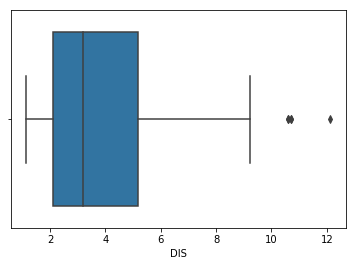

In [8]:
import seaborn as sns
sns.boxplot(x=df['DIS'])

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.565378
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [25]:
# import the library for linear regression
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
x_train, s_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, random_state=4)

x_train.head()





,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
138,0.24980,0.0,21.89,0.0,0.624,5.857,98.2,1.6686,4.0,437.0,21.2,392.04,21.32
251,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
256,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11


In [24]:
y_train.head()

,MEDV
192,36.4
138,13.3
251,24.8
13,20.4
256,44.0


In [11]:
### model fit 

lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)


In [12]:
# model intercept
model.intercept_

array([35.60325757])

In [13]:
# print coeff

model.coef_

array([[-1.14743504e-01,  4.70875035e-02,  8.70282354e-03,
         3.23818824e+00, -1.67240567e+01,  3.87662996e+00,
        -1.08218769e-02, -1.54144627e+00,  2.92604151e-01,
        -1.33989537e-02, -9.07306805e-01,  8.91271054e-03,
        -4.58747039e-01]])

In [14]:
lm.score(x_train,y_train)

0.7414502395070284

In [26]:
s_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
289,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,6.0,293.0,16.6,371.72,9.51
68,0.13554,12.5,6.07,0.0,0.409,5.594,36.8,6.4980,4.0,345.0,18.9,396.90,13.09
211,0.37578,0.0,10.59,1.0,0.489,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98
226,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13


In [29]:
## Predicted Result
predictions = model.predict(s_test)
print(predictions[0:5])

[[12.06508881]
 [26.98544801]
 [17.59242607]
 [18.15842166]
 [36.91656975]]


In [16]:
pred_res= pd.DataFrame(predictions)
#y_test.head()

act=pd.DataFrame(y_test)


act.reset_index(inplace = True, drop = True) 
#act.head() 

df_pred_act=pd.concat([act,pred_res], axis=1, ignore_index=True)

df_pred_act.rename(columns={0:'Actual',
                          1:'Prediction'}, 
                 inplace=True)

df_pred_act.head()


,Actual,Prediction
0,16.5,12.065089
1,24.8,26.985448
2,17.4,17.592426
3,19.3,18.158422
4,37.6,36.916570


In [17]:
## Actual Result
print(y_test[0:5])

   MEDV
0  16.5
1  24.8
2  17.4
3  19.3
4  37.6


In [18]:

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model1=sm.OLS(y_train,x_train)
result=model1.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     711.8
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          8.37e-263
Time:                        16:24:55   Log-Likelihood:                -1210.8
No. Observations:                 404   AIC:                             2448.
Df Residuals:                     391   BIC:                             2500.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1077      0.039     -2.779      0.0

In [19]:
X = df[["RM", "LSTAT"]]
y = target["MEDV"]

model2 = sm.OLS(y, X).fit()
predictions = model2.predict(X)

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     4637.
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:24:55   Log-Likelihood:                -1582.9
No. Observations:                 506   AIC:                             3170.
Df Residuals:                     504   BIC:                             3178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000       4.769       5.045
LSTAT         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's interpret this one now:

This model has a much higher R-squared value — 0.948, which essentially means that this model captures 94.8% of 
the variance in the dependent variable. Now, 
let's try to figure out the relationship between the two variables RM and LSTAT and median house value. 
As RM increases by 1, MEDV will increase by 4.9069, and when LSTAT increases by 1, MEDV will decrease by 0.6557. 
This indicates that RM and LSTAT are statistically significant in predicting (or estimating) the median house value.

You can interpret this relationship in plain English as well:

Houses having a small number of rooms are likely to have low price values.
In the areas where the status of the population, is lower the house prices are likely to be low.

In [20]:
## Final variable choose 

X = df[["CRIM", "ZN", "CHAS", "RM", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]]
y = target["MEDV"]

model3 = sm.OLS(y, X).fit()
predictions = model3.predict(X)

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:24:55   Log-Likelihood:                -1524.6
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     496   BIC:                             3111.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0898      0.034     -2.630      0.009      -0.157      -0.023
ZN             0.0512      0.014      3.630      0.000       0.024       0.079
CHAS           2.7212      0.892      3.052      0.002       0.970       4.473
RM             5.7113      0.245     23.353      0.000       5.231       6.192
DIS           -0.8664      0.167     -5.185      0.000      -1.195      -0.538
RAD            0.1820      0.063      2.867      0.004       0.057       0.307
TAX           -0.0109      0.003     -3.292      0.001      -0.017      -0.004
PTRATIO       -0.4004      0.109     -3.682      0.000      -0.614      -0.187
B              0.0146      0.003      5.475      0.000       0.009       0.020
LSTAT         -0.4499      0.042    -10.596      0.000      -0.533      -0.366
==============================================================================
Omnibus:                      198.034   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1249.000
Skew:                           1.575   Prob(JB):                    6.07e-272
Kurtosis:                      10.022   Cond. No.                     2.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### Predict the result on new dataset

In [28]:
X_new = [0.08, 20, 0.02, 5.52, 4.8, 2.0, 243, 20.2, 355, 10.2]
X_new1=(pd.DataFrame(X_new)).T
#X_new1
predictions2 = model3.predict(X_new1)
predictions2 


0    18.668204
dtype: float64